# Phishing Website Classifier

A phishing website is a fraudulent website designed to mimic a legitimate one to deceive users into divulging sensitive information, such as usernames, passwords, credit card numbers, or other personal details.

Phishing websites often look very similar to legitimate websites, using similar logos, fonts, and layouts to create a sense of trust.

These sites may use URLs that look similar to a legitimate site's URL but have slight variations, such as misspellings or additional characters. For example, a phishing site may use <b><u>www.faceb00k.com</u></b> instead of <b><u>www.facebook.com</u></b>.

The main goal of a phishing website is to steal sensitive information for malicious purposes, including Financial Gain, Identity Theft, Account Compromise and Distribution of Malware.

Such phishing websites can be persuasive, but they can be detected by carefully checking the URL for slight misspellings or unusual characters and ensuring the site uses HTTPS for secure communication. Look out for poor grammar or spelling mistakes, be cautious of urgent messages prompting quick action, and always verify the source by manually entering the website address instead of clicking on suspicious links.

Not all users are observant enough to distinguish phishing websites from genuine ones. So, it is imperative to build a model that can accurately classify phishing sites, helping protect users from online threats and safeguarding their sensitive information.

In this project, we explore a dataset related to a classification task that aims to differentiate between phishing and legitimate activities based on various features. The dataset consists of multiple predictor variables, each representing a distinct characteristic or behavior that may indicate whether an activity is phishing or legitimate. The target variable, labeled as 'Result', has two classes: 'Phishing' and 'Legitimate'.

To accomplish this task, we will build and evaluate several machine learning models. The primary goal is to develop a model that accurately predicts the class of each observation based on the provided features. We will start by preprocessing the data, followed by the implementation of various classifiers such as Logistic Regression, Support Vector Machine (SVM), Random Forest, and Gradient Boosting. We will also perform hyperparameter tuning to optimize model performance. The effectiveness of these models will be evaluated using metrics like accuracy, precision, recall, and F1 score to determine the best model for this classification task.

In [49]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Phishing Data - Phishing Data.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [50]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [51]:
# Check for null values
df.isna().sum().sum()

0

The dataset contains information relevant to identifying phishing websites. Upon initial inspection using df.info() and df.describe(), it was confirmed that the dataset includes several categorical and numerical features that can be utilized for model building. A further check for missing values using df.isnull().sum() revealed that there are no missing values in any of the columns. This completeness ensures that the data is ready for analysis and model development without the need for imputation or data cleaning. Moving forward, we will use this dataset to build a machine learning model to classify websites as either phishing or legitimate based on the provided features.

In [52]:
# chack for class imbalance
df.Result.value_counts(normalize=True) * 100

Result
0    55.456026
1    44.543974
Name: proportion, dtype: float64

The dataset displays a moderate class imbalance, with approximately 55.46% of the instances labeled as '0' (legitimate) and 44.54% labeled as '1' (phishing). This imbalance is not severe, indicating that the dataset has a relatively even distribution of both classes, which allows for building a machine learning model without significant bias towards either class.

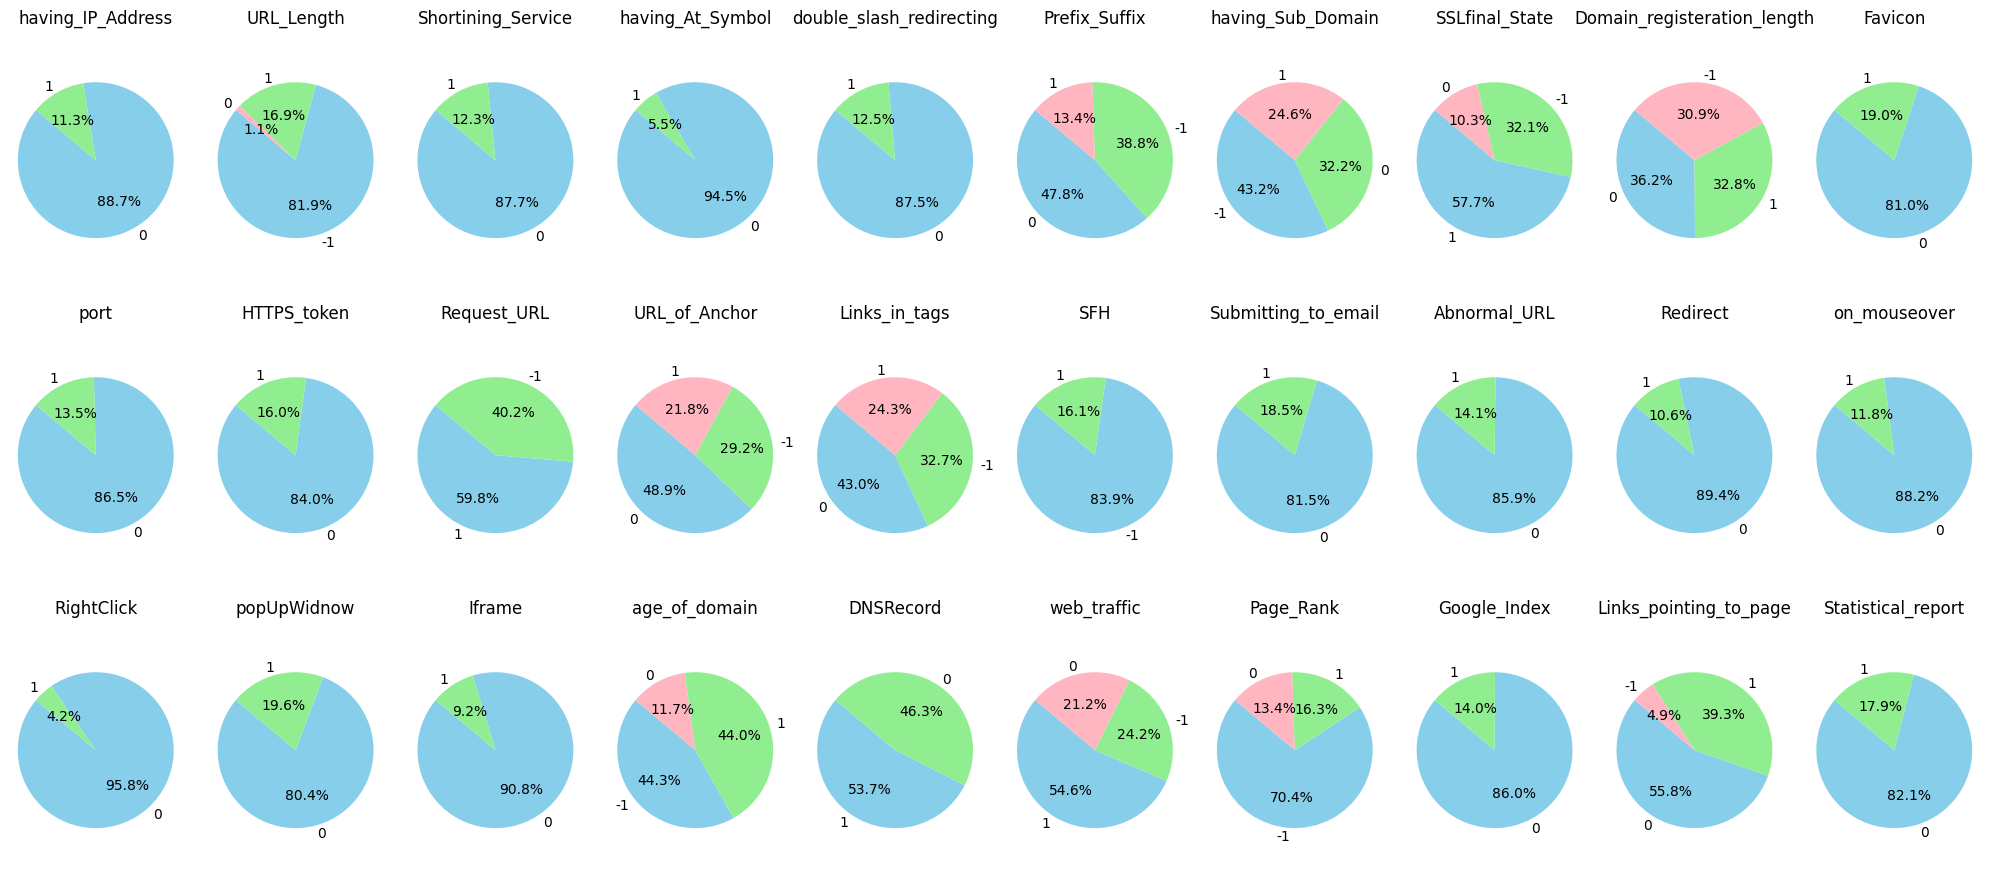

In [37]:
# Exclude the target variable 'Result'
features = [col for col in df.columns if col != 'Result']

# Define colors for the pie chart segments
colors = ['skyblue', 'lightgreen', 'lightpink']

# Create subplots with a fixed 3x10 layout
num_rows = 3
num_cols = 10

# Create the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 9))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot pie charts
for ax, feature in zip(axes, features):
    # Get the value counts and their percentages
    value_counts = df[feature].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    
    # Plot pie chart
    ax.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=140)
    ax.set_title(feature)
    ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

# Remove any empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Key Findings from the data distribution

* having_IP_Address: Most websites (~88.7%) do not have an IP address in their URL, which is often a sign of legitimate websites, while 11.3% of websites do.
* URL_Length: The majority (~81.9%) of websites have a normal URL length (category 0), while a small proportion has abnormal lengths.
* Shortening_Service: About 12.3% of websites use URL shortening services (category 1), which can sometimes be associated with phishing attempts.
* having_At_Symbol: Around 5.5% of websites have an '@' symbol, which is often indicative of phishing websites.
* SSLfinal_State: Most websites (57.7%) have a valid SSL certificate (1), while 32.1% do not (category 0), which can be a potential indicator of phishing.
* Domain_registration_length: The distribution is mixed, with many sites having different domain registration lengths, possibly reflecting a mix of phishing and legitimate websites.
* Favicon: Most sites (~81%) use a legitimate favicon, and this might help in determining whether a website is phishing or not.
* Request_URL, URL_of_Anchor, Links_in_tags: These features show some balance between categories, indicating that they might play an important role in phishing detection.
* HTTPS_token, RightClick, popUpWidnow, Iframe: A large percentage of websites have proper security measures, like no popups or iframe elements.
* Abnormal_URL: Most websites (~85.9%) do not have abnormal URLs, suggesting that this feature might be critical in flagging phishing attempts when present.
* Page_Rank, Google_Index, web_traffic: Higher page rank and web traffic are often associated with legitimate sites, while phishing sites generally have lower values in these categories.
* Statistical_report: This feature seems to suggest that a high percentage of websites in this dataset fall into a particular statistical classification, possibly indicating more legitimate sites than phishing ones.

We will now proceed to train our model using a variety of classifiers to identify which one performs best for this task. By evaluating multiple models, including logistic regression, SVM, Random Forest, we can determine the most effective approach for distinguishing between legitimate and phishing websites based on the features in our dataset. This comprehensive evaluation will help us select the model that provides the highest accuracy and robustness for our phishing detection system.

# Using Logisitc Regression

Logistic Regression is a good choice for this task because:

* Binary Classification: It’s designed for problems with two classes, like 'Phishing' and 'Legitimate'.
* Easy to Understand: The results are straightforward and you can easily see how features affect the outcome.
* Probabilities: It provides the probability of each class, which helps in understanding the confidence of predictions.
* Efficient: It’s fast to train and works well with large datasets.
* Handles Categorical Data: It works well with categorical features when they are encoded properly.

In short, Logistic Regression is simple, effective, and efficient for binary classification tasks.

In [53]:
# Exclude the target variable 'Result'
X = df.drop('Result', axis = 1)
y = df['Result']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=10)

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [56]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.96
Recall: 0.92
F1 Score: 0.94


The evaluation metrics for the logistic regression model indicate strong performance in identifying phishing websites. The model achieved an accuracy of 0.95, meaning it correctly classified 95% of the cases. The precision of 0.96 suggests that when the model predicts a website is phishing, it is correct 96% of the time. The recall of 0.92 indicates that the model correctly identifies 92% of all actual phishing websites. The F1 Score, which balances precision and recall, is 0.94, demonstrating that the model effectively balances the ability to identify phishing websites while minimizing false positives. Overall, these metrics suggest that the logistic regression model is a reliable choice for this task.

However, let us try another classifier as well.

## Using SVM

Support Vector Machines can be suitable for this task because:

* Effective in High Dimensions: SVM works well with high-dimensional data, which is useful if you have many features.
* Class Separation: It finds the optimal boundary (hyperplane) that best separates classes, which can lead to better accuracy.
* Kernel Trick: SVM can use different kernel functions (like RBF) to handle non-linear relationships between features, potentially capturing complex patterns that Logistic Regression might miss.
* Robust to Overfitting: With proper tuning, SVM is less likely to overfit, especially in high-dimensional spaces.
* Complex Boundaries: SVM's kernel functions allow it to model more complex decision boundaries than the linear boundary of Logistic Regression.
* Higher Accuracy: In some cases, SVM can achieve higher accuracy by better separating the classes, especially in cases with non-linear relationships.
* Better Handling of Noise: SVM can be more robust to noise in the data compared to Logistic Regression, thanks to its margin-based optimization.

In [57]:
from sklearn.svm import SVC

# Initialize the SVM model with a chosen kernel
model = SVC(kernel='rbf', random_state=10)

# Fit the model to the training data
model.fit(X_train, y_train)

SVC(random_state=10)

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.96
F1 Score: 0.96


The evaluation metrics for the SVM (Support Vector Machine) model indicate excellent performance in identifying phishing websites. With an accuracy of 0.97, the model correctly classified 97% of the cases. The precision of 0.97 shows that when the model predicts a website is phishing, it is correct 97% of the time. The recall of 0.96 indicates that the model successfully identifies 96% of all actual phishing websites. The F1 Score of 0.96, which balances both precision and recall, further demonstrates that the SVM model maintains a strong balance between detecting phishing websites and minimizing false positives. These results suggest that the SVM model is slightly more effective than Logistic Regression for our task.

## I+Using Random forest classifier

Random Forest is well-suited for this task due to its ability to handle both numerical and categorical features, manage large datasets, and deal with missing values. Its ensemble approach, which combines multiple decision trees, improves predictive accuracy and reduces the risk of overfitting compared to Logistic Regression, which might not capture complex patterns in the data. Unlike SVM, which may struggle with very large datasets and requires careful tuning of kernel parameters, Random Forest is more robust and less sensitive to hyperparameter settings. Additionally, Random Forest provides feature importance insights, which can be valuable for understanding the factors driving predictions. Overall, its versatility, robustness, and ease of use make Random Forest a strong candidate, potentially outperforming both Logistic Regression and SVM in various scenarios.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=10)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


The evaluation metrics for the Random Forest model show exceptional performance in detecting phishing websites. With an accuracy of 0.97, the model correctly classifies 97% of cases. The precision of 0.97 indicates that when the model predicts a website is phishing, it is correct 97% of the time. Similarly, a recall of 0.97 shows that the model successfully identifies 97% of all actual phishing websites. The F1 Score of 0.97, which balances precision and recall, confirms the model's effectiveness in maintaining a high detection rate while minimizing false positives. Compared to the Logistic Regression and SVM models, the Random Forest model provides a slight edge, achieving consistently high scores across all metrics, making it the best-performing model among the three.

To further enhance the performance of the Random Forest classifier, we will now perform hyperparameter tuning. This process involves adjusting the model's parameters to find the optimal combination that maximizes its accuracy and generalization capability on the dataset.

In [61]:
#Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],          # number of trees
    'max_depth': [None, 10, 20, 30],         # max depth of trees
    'min_samples_split': [2, 5, 10],         # min number of samples to split a node
    'min_samples_leaf': [1, 2, 4],           # min number of samples at a leaf node
    'max_features': ['sqrt', 'log2', None]   # number of features to consider when looking for the best split
}

# initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


The hyperparameter tuning process involved fitting the Random Forest model 1,620 times across different combinations of hyperparameters using 5-fold cross-validation. The best hyperparameters identified through this search are:

- **n_estimators**: 100 (number of trees in the forest)
- **max_depth**: None (no limit on the depth of each tree)
- **max_features**: 'log2' (logarithm of the number of features is considered at each split)
- **min_samples_leaf**: 1 (minimum number of samples required to be at a leaf node)
- **min_samples_split**: 2 (minimum number of samples required to split an internal node)

These hyperparameters should provide an optimal balance between model complexity and performance, leading to a more effective Random Forest classifier.

In [62]:
# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       414
           1       0.98      0.97      0.97       323

    accuracy                           0.98       737
   macro avg       0.98      0.98      0.98       737
weighted avg       0.98      0.98      0.98       737



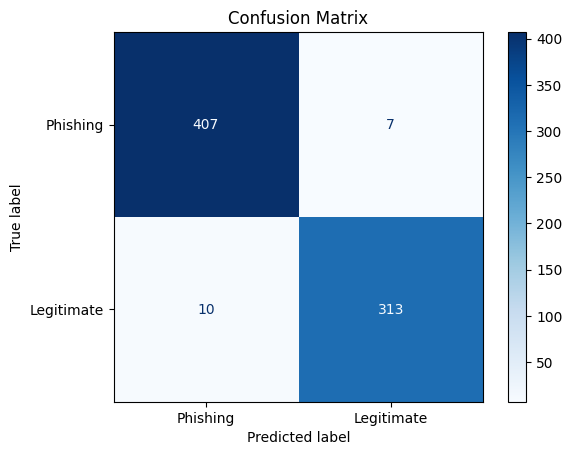

In [63]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'Legitimate'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The evaluation metrics for the Random Forest model with the tuned hyperparameters reveal impressive performance. The model achieved a precision of 0.98 for both the legitimate (class 0) and phishing (class 1) classes. This indicates that the model is highly accurate in distinguishing between the two classes, minimizing false positives. The recall scores are also high, with 0.98 for class 0 and 0.97 for class 1. This demonstrates that the model effectively identifies the majority of true instances for both classes, ensuring that phishing attempts are largely detected.

The F1 scores, which combine precision and recall, are 0.98 for class 0 and 0.97 for class 1. These values reflect a strong balance between precision and recall, showing that the model performs well across both metrics. Additionally, the overall accuracy of 0.98 signifies that the model correctly classifies 98% of the samples in the dataset.

Overall, this Random Forest model with tuned hyperparameters offers the best performance compared to the models tested so far. Its superior accuracy, precision, recall, and F1 scores highlight its effectiveness in detecting phishing websites and make it the most reliable choice among the models evaluated.

The high accuracy and balanced precision and recall indicate that this model is highly reliable for real-world phishing detection. By correctly classifying 98% of the instances, it significantly enhances the security of users against phishing attempts.

However, it's important to consider that while the Random Forest model shows exceptional results, real-world applications should also account for possible limitations and ensure continuous evaluation and updates to address evolving threats.